<a href="https://colab.research.google.com/github/phillipsophie/project_gss/blob/main/project_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

**Should be around a 350 word description of the questions, methods, and results

# Data

** Should be one to two pages discussion the data and key variables in the analysis, and any challenges in reading, cleaning, and preparing for analysis

note: there is code to display the basic graphs individually in the section titled 'code to get individual basic plots' below, but we will need to rework some code to get the individual plots from the subplots in db_project.ipynb

### Getting the GSS Data

Since the data files are about 40GB zipped, we can't store a compressed or uncompressed version on GitHub, and the entire dataset can't really be loaded into memory with Colab.

On GitHub, the data are broken into three smaller files, saved in .parquet format. The code below will load these chunks into memory, one at a time, you can specify the variables you want in `var_list`, and the results will be saved in `selected_gss_data.csv`.

You can add more cleaning instructions in between the lines where the data are loaded ( `df = pd.read_parquet(url)`) and the data are saved (`df.loc...`). It's probably easiest to use this code to get only the variables you want, and then clean that subset of the data.

In [ ]:
import pandas as pd
#
var_list = ['wrkstat', 'prestige'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    #print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    #print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

# Results

** Should be two to five pages providing visualizations, statistics, and a discussion of your findings

  - religion graphs showed the most variation from the trend (of the basic graphs)
  - almost all of the age graphs had the same trend of the percentage increasing as age decreased with the exception of the youngest age group
  - almost all of the age and gender graphs followed the trends of the basic graphs
  - most interesting religion graphs:
      - fepresch2: jewish and interdenominational had more strongly disagree than disagree
      - prntlk: muslim 'mother much better', hinduism has more 'mother somewhat' than 'equal'
      - prntfnce: buddhism and hinduism have more 'father somewhat' than 'equally', interdenominational have equal amount of 'equal' and 'father most'
      - sharehhw: hinduims has almost 100% 'r does much less than fair'
      - cabgndr: muslim mostly 'women somewhat' then 'equal' then 'men much', hinduism equally split between 'equal', 'women somewhat' and 'women much'
      - execgndr: hinduism equally split between 'equal', 'women somewhat' and 'women much'
      - orginc: muslim equal amounts towards 'pool all' and 'seperate'
  - most interesting age graphs:
      - sharehhw: mostly but not completely follows trend
      - orginc: '18-29' equal across all options
  - most interesting gender graphs:
      - fechld: female follows trend with more 'strongly agree', males don't follow trend, most agree followed by disagree
      - fepresch2: more females than males strongly disagree
      - sharehhw: every category points tpwards women doing more
      - orginc:most dramatic deviannce from trends

There are note on cleaning on this doc (https://docs.google.com/document/d/1BuhptWbv4buHo7G-Lyn-tFOswH3o8eOgrKn7xyp9UoI/edit?usp=sharing) but it does not include everything, we will need to reference ds_project.ipynb for more notes on cleaning.

# Conclusion

** Should be one to two pages summarizing teh project, defending it from criticism, and suggesting additional work that was outside the scope of the project

# Code to get individual basic plots

In [40]:
# just plotting this would include responses that are never given, which crowds the graph
df['fechld'].value_counts()

agree                            6805
strongly agree                   4850
disagree                         3061
strongly disagree                 680
not imputable_(2147483638)          0
not available in this year          0
not available in this release       0
uncodeable                          0
skipped on web                      0
refused                             0
no answer                           0
not imputable_(2147483637)          0
dk, na, iap                         0
I don't have a job                  0
iap                                 0
don't know                          0
see codebook                        0
Name: fechld, dtype: int64

Text(0.5, 1.0, 'A working mother can establish just as warm and secure a \n relationship with her children as a mother who does not work')

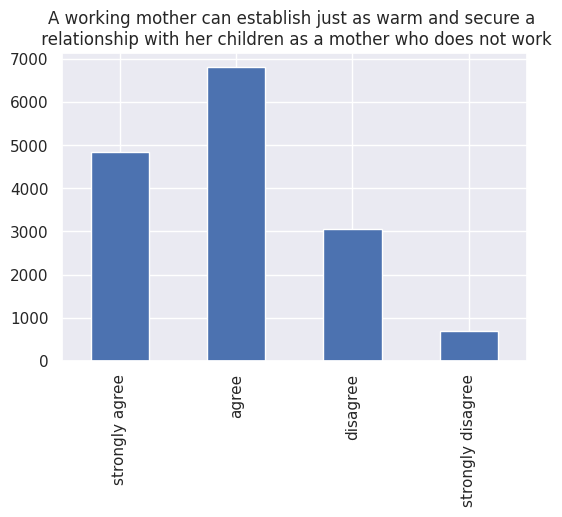

In [41]:
#FECHLD
fechld = df['fechld'].value_counts()[['strongly agree','agree', 'disagree','strongly disagree']] # value counts returns type series
fechld[fechld != 0].plot(kind='bar') # removes counts equal to 0
plt.title("A working mother can establish just as warm and secure a \n relationship with her children as a mother who does not work")

Text(0.5, 1.0, 'On average, how many hours a week do you spend looking after family \n members (e.g. children, elderly, ill or disabled family members)?')

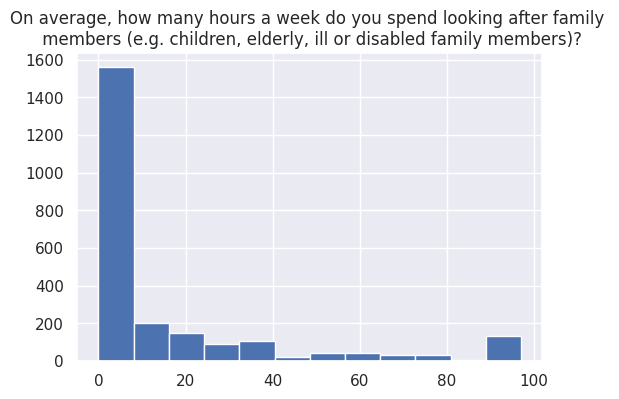

In [42]:
#RFAMLOOK
plt.hist(df['rfamlook'], bins =12)
plt.title("On average, how many hours a week do you spend looking after family \n members (e.g. children, elderly, ill or disabled family members)?")

Text(0.5, 1.0, 'A pre-school child is likely to suffer if his or her mother works.')

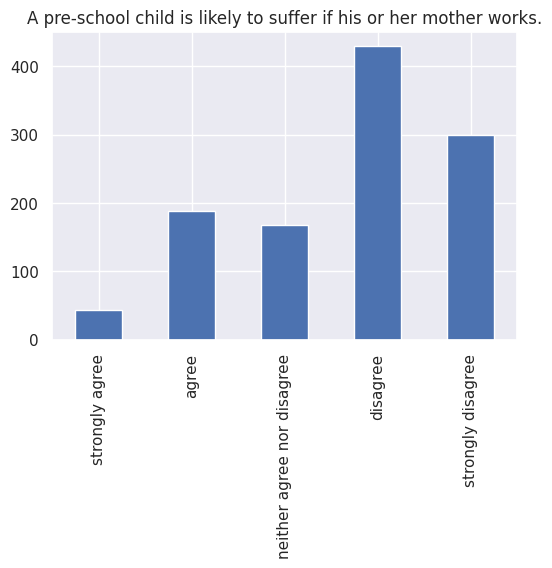

In [43]:
#FEPRESCH2
fepresch2 = df['fepresch2'].value_counts()[['strongly agree','agree', 'neither agree nor disagree','disagree','strongly disagree']].plot(kind='bar')
plt.title("A pre-school child is likely to suffer if his or her mother works.")

Text(0.5, 1.0, 'How much responsibility should women and men have for the home and family?')

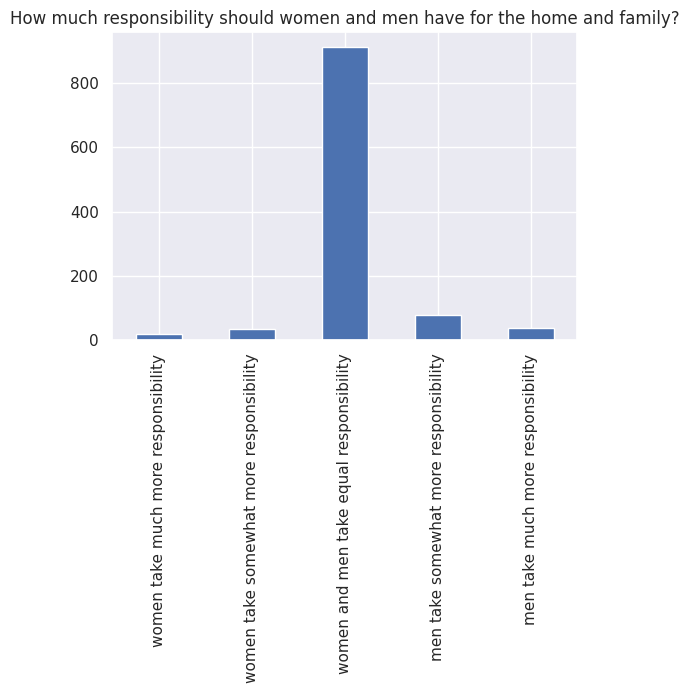

In [44]:
#RSPGNDR
rspgndr = df['rspgndr'].value_counts()[['women take much more responsibility', 'women take somewhat more responsibility', 'women and men take equal responsibility', 'men take somewhat more responsibility', 'men take much more responsibility']] # value counts returns type series
rspgndr[rspgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("How much responsibility should women and men have for the home and family?")

Text(0.5, 1.0, 'How well are mothers and fathers are suited to look after their children?')

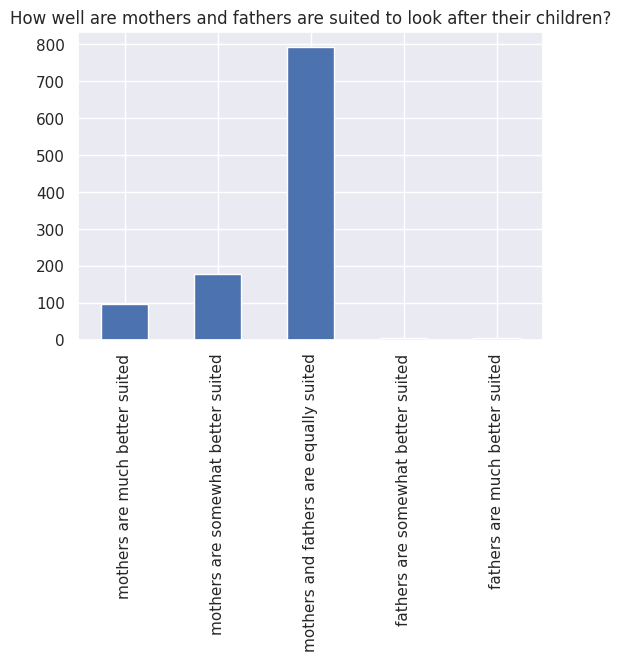

In [45]:
#PRNTLK
prntlk = df['prntlk'].value_counts()[['mothers are much better suited','mothers are somewhat better suited','mothers and fathers are equally suited','fathers are somewhat better suited','fathers are much better suited']] # value counts returns type series
prntlk[prntlk != 0].plot(kind='bar') # removes counts equal to 0
plt.title("How well are mothers and fathers are suited to look after their children?")

Text(0.5, 1.0, '5yro child - Who should provide for the family financially?')

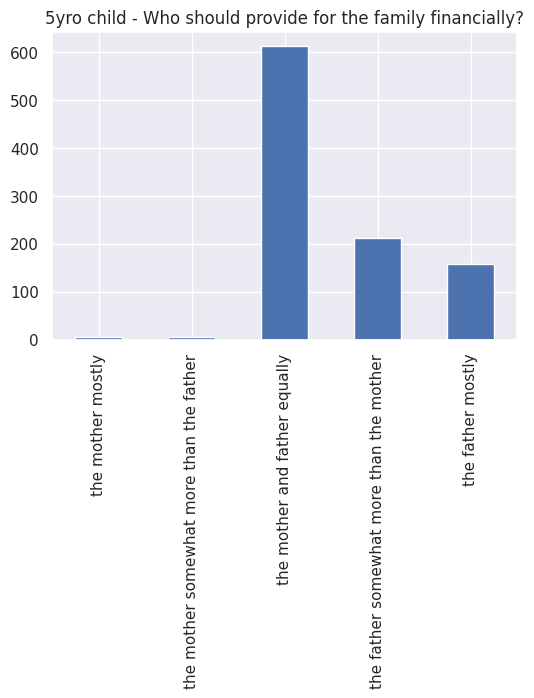

In [46]:
#PRNTFNCE
prntfnce = df['prntfnce'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntfnce[prntfnce != 0].plot(kind='bar') # removes counts equal to 0
plt.title("5yro child - Who should provide for the family financially?")

Text(0.5, 1.0, 'Who should take care of the child on a daily basis?')

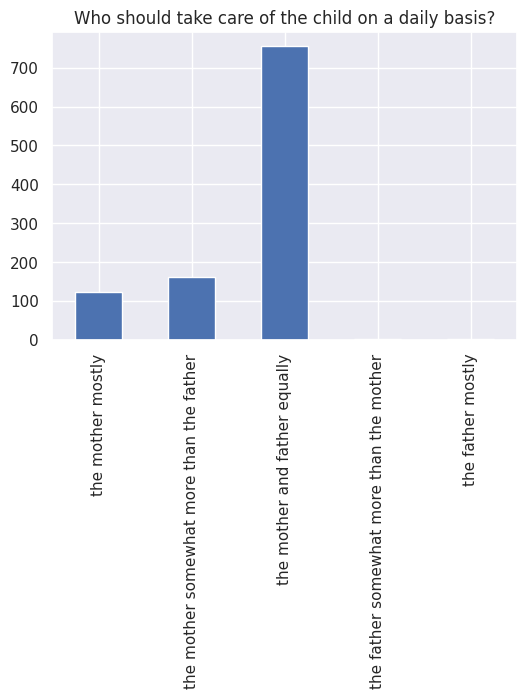

In [47]:
#PRNTCRE
prntcre = df['prntcre'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntcre[prntcre != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should take care of the child on a daily basis?")

Text(0.5, 1.0, 'Who should play with the child, and \ntake part in his/her leisure activities?')

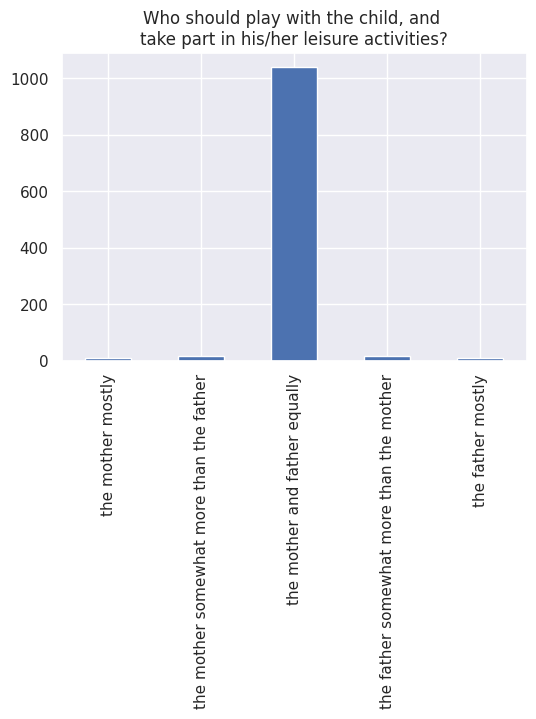

In [48]:
#PRNTPLY
prntply = df['prntply'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntply[prntply != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should play with the child, and \ntake part in his/her leisure activities?")

Text(0.5, 1.0, 'Who should teach the child how to behave?')

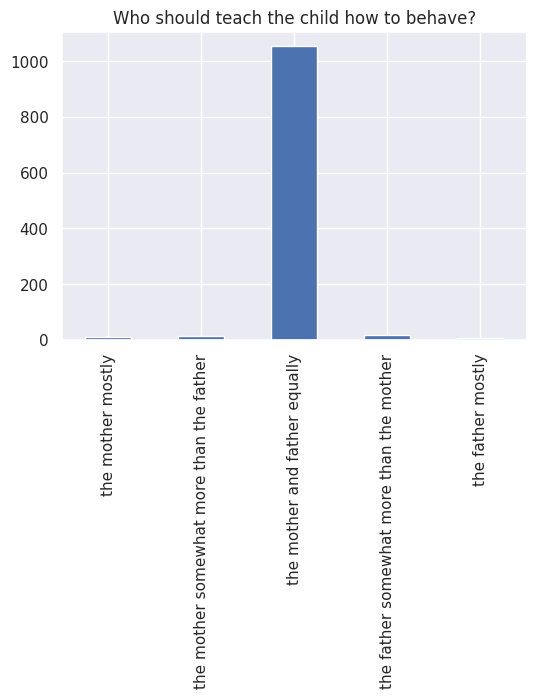

In [49]:
#PRNTBHAV
prntbhav = df['prntbhav'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntbhav[prntbhav != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should teach the child how to behave?")

Text(0.5, 1.0, 'Who should take time to listen to and \nadvise the child if he/she has problems?')

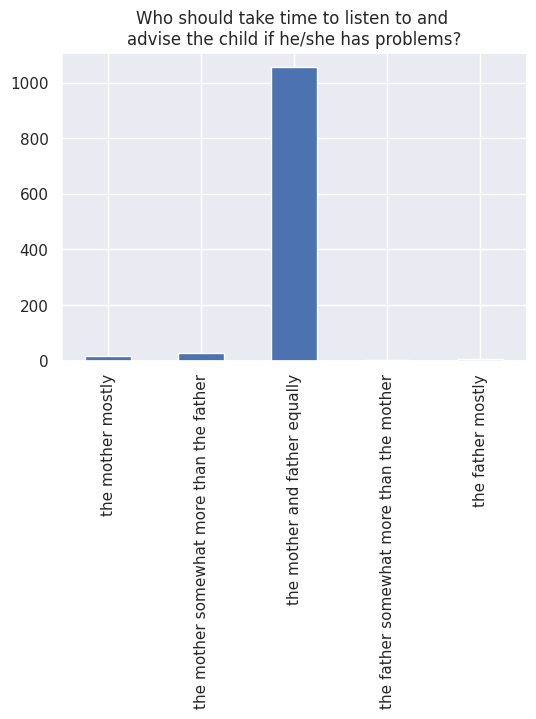

In [50]:
#PRNTADVS
prntadvs = df['prntadvs'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntadvs[prntadvs != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should take time to listen to and \nadvise the child if he/she has problems?")

Text(0.5, 1.0, 'Who should try to be a role model for the child?')

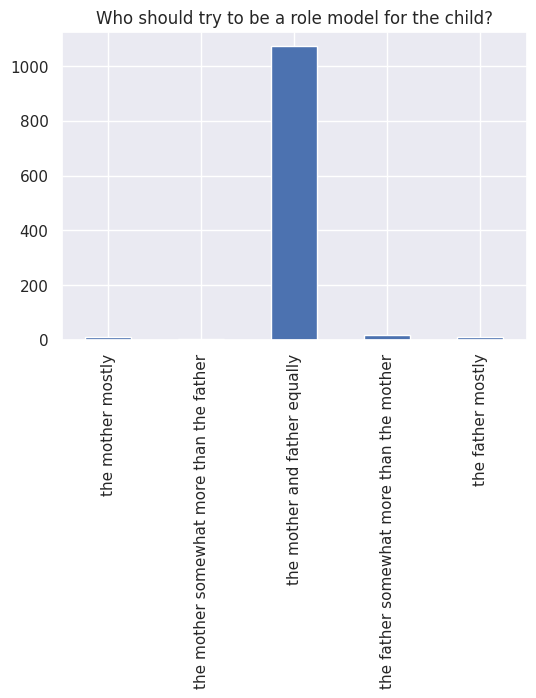

In [51]:
#PRNTMDL
prntmdl = df['prntmdl'].value_counts()[['the mother mostly','the mother somewhat more than the father','the mother and father equally','the father somewhat more than the mother','the father mostly']] # value counts returns type series
prntmdl[prntmdl != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who should try to be a role model for the child?")

Text(0.5, 1.0, 'How do you and your spouse/partner organize the \nincome that one or both of you receive?')

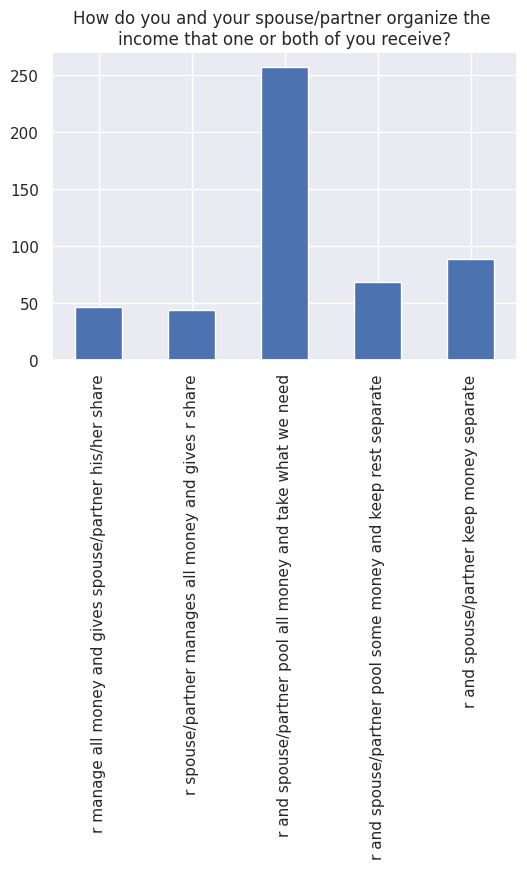

In [52]:
#ORGINC
orginc = df['orginc'].value_counts()[['r manage all money and gives spouse/partner his/her share',
                                      'r spouse/partner manages all money and gives r share',
                                      'r and spouse/partner pool all money and take what we need',
                                      'r and spouse/partner pool some money and keep rest separate',
                                      'r and spouse/partner keep money separate']] # value counts returns type series
orginc[orginc != 0].plot(kind='bar') # removes counts equal to 0
plt.title("How do you and your spouse/partner organize the \nincome that one or both of you receive?")

Text(0.5, 1.0, 'Sharing of household work between you and your spouse/partner')

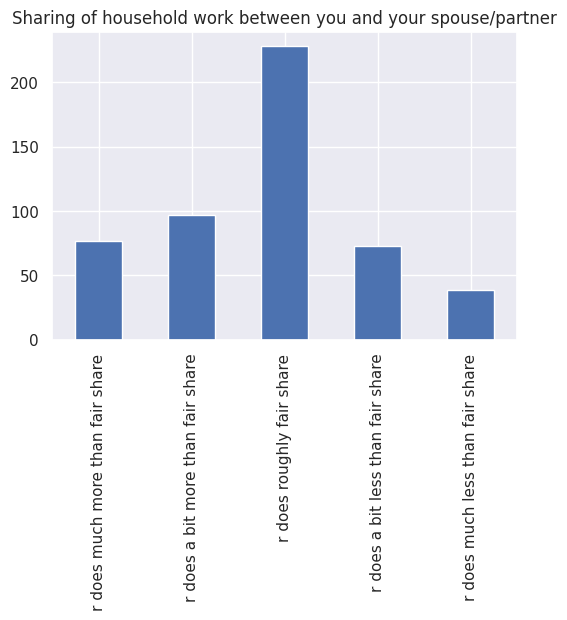

In [53]:
#SHAREHHW
sharehhw = df['sharehhw'].value_counts()[['r does much more than fair share',
                                      'r does a bit more than fair share',
                                      'r does roughly fair share',
                                      'r does a bit less than fair share',
                                      'r does much less than fair share']] # value counts returns type series
sharehhw[sharehhw != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Sharing of household work between you and your spouse/partner")

Text(0.5, 1.0, 'Who is better suited for the role of a member of the cabinet?')

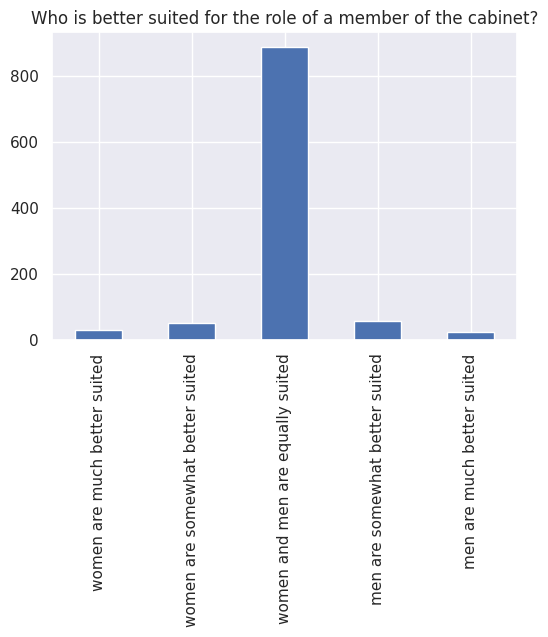

In [54]:
#CABGNDR
cabgndr = df['cabgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
cabgndr[cabgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who is better suited for the role of a member of the cabinet?")

Text(0.5, 1.0, 'Who is better suited for the role of a head of a university?')

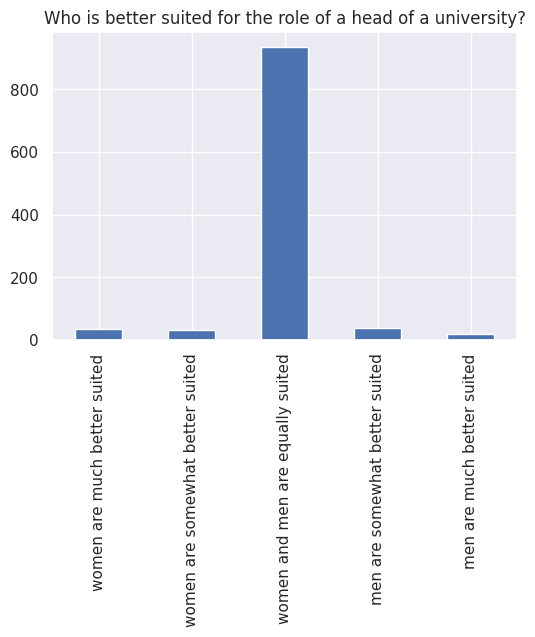

In [55]:
#UNIVGNDR
univgndr = df['univgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
univgndr[univgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who is better suited for the role of a head of a university?")

Text(0.5, 1.0, 'Who is better suited for the role of \na senior executive of a large company?')

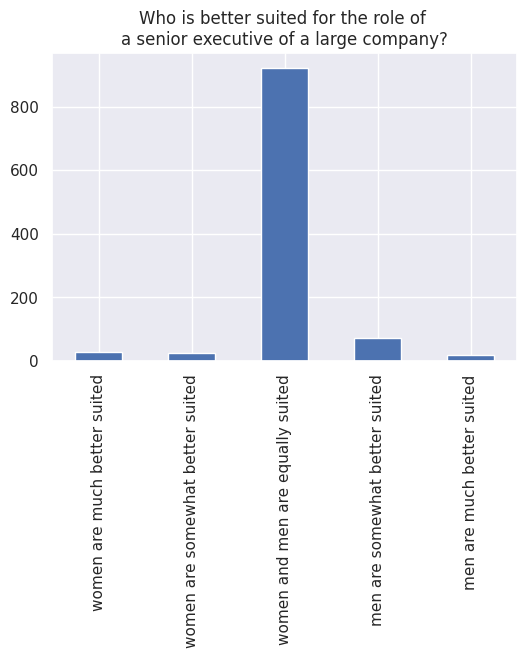

In [56]:
#EXECGNDR
execgndr = df['execgndr'].value_counts()[['women are much better suited',
                                      'women are somewhat better suited',
                                      'women and men are equally suited',
                                      'men are somewhat better suited',
                                      'men are much better suited']] # value counts returns type series
execgndr[execgndr != 0].plot(kind='bar') # removes counts equal to 0
plt.title("Who is better suited for the role of \na senior executive of a large company?")